### Лабораторная работа 2: основные понятия

В сегодняшней лабораторной будем работать с данными о проданных на аукционе автомобилях (`Carvana Car Prediction`). Целевым признаком здесь является наличие скрытых продавцом существенных недостатков. 

Carvana &mdash; компания-перекупщик автомобилей, соответственно, ее задача &mdash; не допустить скупку автомобилей со скрытыми недостатками, так как их впоследствии тяжелее продавать.

## 1

Загрузите данные о проданных на аукционе автомобилях. Посмотрите на "сырые" данные. 

Просмотрите файл `DataDictionary-ru.txt` и поймите, что означают столбцы матрицы. Выведите статистику по столбцам.


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("data.csv", delimiter=',')

## 2

Постройте график рассеяния с пробегом в качестве оси абсцисс и ценой `MMRCurrentRetailAveragePrice` в качестве оси ординат. Автомобили без недостатков отметьте зеленым цветом, со скрытыми недостатками — красным.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

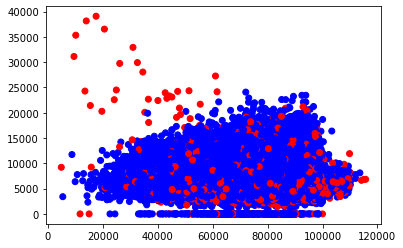

In [5]:
colors = {0 : 'blue', 1 : 'red'}
plt.scatter(data['VehOdo'], data['MMRCurrentRetailAveragePrice'], c = [colors[i] for i in data['IsBadBuy']])

# Регрессия

## 3a

Импортируйте из библиотеки `sklearn` все модели машинного обучения:

`from sklearn import *`

Трактуя задачу о предсказании наличия недостатков как задачу регрессии, натренируйте линейную модель [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) на каком-нибудь подмножестве признаков (например, тех же `VehOdo` и `MMRCurrentRetailAveragePrice`). 

С какой проблемой вы столкнулись? Какие способы ее решения вы можете предложить?

*Функции, которые могут пригодиться при решении: `.fit(), .loc[], pd.notnull()`*

*Создание модели:* `model1 = linear_model.LinearRegression()`

*Тренировка:*
`model1.fit(x, y)`



In [6]:
from sklearn import *

In [7]:
data.describe()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72983.000000,69814.000000,72983.000000,72965.000000,72965.000000,72965.000000,72965.000000,72668.000000,72668.000000,72668.000000,72668.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,36511.428497,0.122988,2005.343052,4.176644,1.494299,71499.995917,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8775.723331,10145.385314,26345.842155,58043.059945,6730.934326,0.025280,1276.580985
std,21077.241302,0.328425,1.731252,1.712210,0.521290,14578.913128,2461.992768,2722.491986,3156.285284,3385.789541,2434.567723,2686.248852,3090.702941,3310.254351,25717.351219,26151.640415,1767.846435,0.156975,598.846788
min,1.000000,0.000000,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000,462.000000
25%,18257.500000,0.000000,2004.000000,3.000000,1.000000,61837.000000,4273.000000,5406.000000,6280.000000,7493.000000,4275.000000,5414.000000,6536.000000,7784.000000,17212.000000,32124.000000,5435.000000,0.000000,837.000000
50%,36514.000000,0.000000,2005.000000,4.000000,1.000000,73361.000000,6097.000000,7303.000000,8444.000000,9789.000000,6062.000000,7313.000000,8729.000000,10103.000000,19662.000000,73108.000000,6700.000000,0.000000,1155.000000
75%,54764.500000,0.000000,2007.000000,5.000000,2.000000,82436.000000,7765.000000,9021.000000,10651.000000,12088.000000,7736.000000,9013.000000,10911.000000,12309.000000,22808.000000,80022.000000,7900.000000,0.000000,1623.000000
max,73014.000000,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.000000,45469.000000,1.000000,7498.000000


In [8]:
data.loc[pd.isnull(data['VehOdo']), 'VehOdo'] = data['VehOdo'].mean()
data.loc[pd.isnull(data['MMRCurrentRetailAveragePrice']), 'MMRCurrentRetailAveragePrice'] = data['MMRCurrentRetailAveragePrice'].mean()

X = data['VehOdo'].values.reshape(-1, 1)
Y = data['MMRCurrentRetailAveragePrice'].values.reshape(-1, 1)

# X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=0)

In [9]:
model1 = linear_model.LinearRegression()

# model1.fit(X_train, Y_train)
model1.fit(X, Y)

# print(model1.intercept_)
# print(model1.coef_)

LinearRegression()

## 3b

Выполните предсказание для всех объектов обучающей выборки и присвойте результат переменной prediction

*Функции, которые могут пригодиться при решении: `model.predict()`*

In [10]:
# Y_pred = model1.predict(X_test)
prediction = model1.predict(X)

# df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predict': Y_pred.flatten()})
# df
print(prediction)

[[8834.23789652]
 [8849.40178964]
 [8783.41701085]
 ...
 [8832.41702878]
 [8802.58281109]
 [8760.23262885]]


## 3c

Преобразуйте получившийся вектор предсказаний `prediction` к значениям `{0,1}`. Это можно сделать, например, используя list comprehensions: https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions 

`predictionClass = [1 if prediction[i] > 0.5 else 0 for i in range(prediction.shape[0])]`

In [11]:
predictionClass = [1 if prediction[i] > 8800 else 0 for i in range(prediction.shape[0])]

# print(predictionClass)

## 3d

Постройте отчет по качеству классификации и матрицу ошибок. Как изменятся отчет и матрица ошибок, если изменить порог в задании 3c (по умолчанию его значение равно 0.5)?

*Функции, которые могут пригодиться при решении: `print(metrics.classification_report(...))`, `print(metrics.confusion_matrix(...))`*

Функция classification_report для каждого класса объектов считает точность (precision) в этом классе и полноту (recall). Полнота - это процент объектов данного класса, которые ваш метод предсказания тоже отнес к этому классу, среди всех объектов данного класса. Точность (precision) - то же самое, только среди всех объектов, предсказанных для этого класса.

Функция confusion_matrix возвращает матрицу с количествами объектов. Номера столбцов матрицы - это номера предсказанных классов, строки - это номера правильных классов. Например, элемент M[0,1] - это количество машин, где на самом деле IsBadBuy = 0, а вы предсказали 1.

In [12]:
# print(predictionClass)
print(metrics.classification_report(data['IsBadBuy'] ,predictionClass))

print(metrics.confusion_matrix(data['IsBadBuy'], predictionClass))

              precision    recall  f1-score   support

           0       0.89      0.66      0.76     64007
           1       0.15      0.43      0.23      8976

    accuracy                           0.63     72983
   macro avg       0.52      0.55      0.49     72983
weighted avg       0.80      0.63      0.70     72983

[[42449 21558]
 [ 5104  3872]]


# Классификация

## 4a
Трактуя задачу как задачу классификации, постройте модель классификации «решающее дерево» глубины 20  (все аналогично линейной регрессии).


*Функции, которые могут пригодиться при решении: `tree.DecisionTreeClassifier(max_depth=20) `*

In [52]:
model2 = tree.DecisionTreeClassifier(max_depth=20)
# Y.astype(int)

#поделил данные потом-что не работало

sliceData = data.loc[0:7000]

X = sliceData['VehOdo'].values.reshape(-1, 1)
Y = sliceData['MMRCurrentRetailAveragePrice'].values.reshape(-1, 1)

#тренируем модель
model2.fit(X.astype(int), Y.astype(int))

DecisionTreeClassifier(max_depth=20)

## 4b

Решающее дерево предсказывает вероятности. С помощью построенной модели рассчитайте вероятности наличия скрываемых недостатков.

*Функции, которые могут пригодиться при решении: `model.predict_proba() `*

In [54]:
#если верить описанию то это предсказание, возвращает громоздкий объект, https://alexanderdyakonov.files.wordpress.com/2015/04/ama2015_scikit.pdf
# prediction = model2.predict_proba(X.astype(int))
prediction = model2.predict(X.astype(int))
print(pred)

[3204 3579 3294 ...    0 3740 3082]


## 4c

Преобразуйте получившийся вектор предсказаний `prediction` к значениям `{0,1}`. Постройте отчет о классификации и матрицу ошибок. Какой метод оказался лучше?

In [57]:
predClass = [1 if prediction[i] > 0.5 else 0 for i in range(prediction.shape[0])]



print(metrics.classification_report(sliceData['IsBadBuy'] ,predClass))

print(metrics.confusion_matrix(sliceData['IsBadBuy'], predClass))

              precision    recall  f1-score   support

           0       0.87      0.11      0.20      6170
           1       0.12      0.87      0.21       831

    accuracy                           0.20      7001
   macro avg       0.49      0.49      0.20      7001
weighted avg       0.78      0.20      0.20      7001

[[ 705 5465]
 [ 105  726]]


# Кросс-валидация
## 5a


Разделите исходную выборку на две части, например, используя [slices](https://pythonz.net/references/named/slice/):

`dataTrain = data.loc[0:34999,]
dataTest = data.loc[35000:69999,]`

In [61]:
#я проставил для себя такие значнения, потому-что ноут не сильно сильный
dataTrain = data.loc[0:7000,]
dataTest = data.loc[7001:14000,]

## 5b

Натренируйте решающее дерево на  `dataTrain` и примените к  `dataTrain` и dataTest, вычислив для каждого случая точность предсказания. 

Проведите несколько экспериментов для различных глубин дерева. Напишите в комментариях, для каких глубин модель недообучена, для каких переобучена и где точка раннего останова.

*Функции, которые могут пригодиться при решении: `metrics.accuracy_score() `*

In [73]:
model3 = tree.DecisionTreeClassifier(max_depth=20)

X = dataTrain['VehOdo'].values.reshape(-1, 1)
Y = dataTrain['MMRCurrentRetailAveragePrice'].values.reshape(-1, 1)

model3.fit(X.astype(int), Y.astype(int))

trainPredict = model3.predict(X.astype(int))

Xtest = dataTest['VehOdo'].values.reshape(-1, 1)

testPredict = model3.predict(X.astype(int))

trueVal = [int(Y[i][0]) for i in range(len(Y))]

print(metrics.accuracy_score(trueVal, trainPredict)) 

#тут должно быть что то такое, но я хз как преобразовывать ответ от такого дерева

print(metrics.accuracy_score(trueVal, testPredict))

0.27296100557063274
0.27296100557063274


# Решающая функция
## 6a

Вернемся к модели решающего дерева глубины 20, построенного по всей обучающей выборке `data`. Пусть цена ошибки неправильного предсказания 0 равна 1000, а неправильного предсказания 1 — 100.

Вычислите функцию потерь &mdash; среднюю ошибку на всей обучающей выборке.

In [ ]:
# место для кода

## 6b

Выясните, как нужно изменить решающую функцию `[0 if predictionProb[i][0] > 0.5 else 1 for i in range(prediction.shape[0])]`, чтобы функция потерь была минимальна?

Найдите оптимальную решающую функцию и минимальное значение функционала потерь методом подбора или пользуясь формулой из лекции 2 (слайд Decision function).



In [ ]:
# место для кода